In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

# Warnings
import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
data=pd.read_csv('data.csv',encoding="ISO-8859-1")
data.fillna(0, inplace=True)
data

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0,0.0,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,0.0,0.0,0,0.0,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0,0.0,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0,0.0,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,0.0,0.0,0,0.0,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29
435739,0,0,andaman-and-nicobar-islands,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0
435740,0,0,Lakshadweep,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0


### SO2 individual pollutant index(si)

In [3]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['si']=data['so2'].apply(calculate_si)
df= data[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


### NO2 individual pollutant index(ni)

In [4]:
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['ni']=data['no2'].apply(calculate_ni)
df= data[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


### RSPM individual pollutant index(rspi)

In [5]:
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
data['rpi']=data['rspm'].apply(calculate_si)
df= data[['rspm','rpi']]
df.tail()

,rspm,rpi
435737,143.0,121.000000
435738,171.0,130.333333
435739,0.0,0.000000
435740,0.0,0.000000
435741,0.0,0.000000


### SPM individual pollutant index(spi)

In [6]:
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
data['spi']=data['spm'].apply(calculate_spi)
df= data[['spm','spi']]
df.tail()

,spm,spi
435737,0.0,0.0
435738,0.0,0.0
435739,0.0,0.0
435740,0.0,0.0
435741,0.0,0.0


## AQI Calculation 

In [7]:
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>=ni and si>=spi and si>=rpi):
     aqi=si
    if(spi>=si and spi>=ni and spi>=rpi):
     aqi=spi
    if(ni>=si and ni>=spi and ni>=rpi):
     aqi=ni
    if(rpi>=si and rpi>=ni and rpi>=spi):
     aqi=rpi
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= data[['sampling_date','state','si','ni','rpi','spi','AQI']]
df.head()

,sampling_date,state,si,ni,rpi,spi,AQI
0,February - M021990,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,February - M021990,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,February - M021990,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,March - M031990,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,March - M031990,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [8]:
df.state.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

In [9]:
state=pd.read_csv("newlonglat.csv")
state.head()

,state,lat,long
0,andaman-and-nicobar-islands,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [10]:
dff=pd.merge(state.set_index("state"),df.set_index("state"), right_index=True, left_index=True).reset_index()
dff.head()

,state,lat,long,sampling_date,si,ni,rpi,spi,AQI
0,Daman & Diu,20.3974,72.8328,M011989,2.250,4.375,0.0,25.000000,25.000000
1,Daman & Diu,20.3974,72.8328,M041989,12.000,12.000,0.0,153.333333,153.333333
2,Daman & Diu,20.3974,72.8328,M041989,0.000,17.750,0.0,138.000000,138.000000
3,Daman & Diu,20.3974,72.8328,M041989,7.750,21.250,0.0,-45.000000,21.250000
4,Daman & Diu,20.3974,72.8328,M051989,16.625,16.375,0.0,134.000000,134.000000


In [11]:
data

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,si,ni,rpi,spi,AQI
0,150,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0,0.0,1990-02-01,6.000,21.750,0.000000,0.0,21.750000
1,151,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,0.0,0.0,0,0.0,1990-02-01,3.875,8.750,0.000000,0.0,8.750000
2,152,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0,0.0,1990-02-01,7.750,35.625,0.000000,0.0,35.625000
3,150,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0,0.0,1990-03-01,7.875,18.375,0.000000,0.0,18.375000
4,151,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,0.0,0.0,0,0.0,1990-03-01,5.875,9.375,0.000000,0.0,9.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-24,27.500,95.000,121.000000,0.0,121.000000
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29,25.000,90.000,130.333333,0.0,130.333333
435739,0,0,andaman-and-nicobar-islands,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.000,0.000,0.000000,0.0,0.000000
435740,0,0,Lakshadweep,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.000,0.000,0.000000,0.0,0.000000


### Visualization of AQI across india 

<AxesSubplot:xlabel='year', ylabel='AQI'>

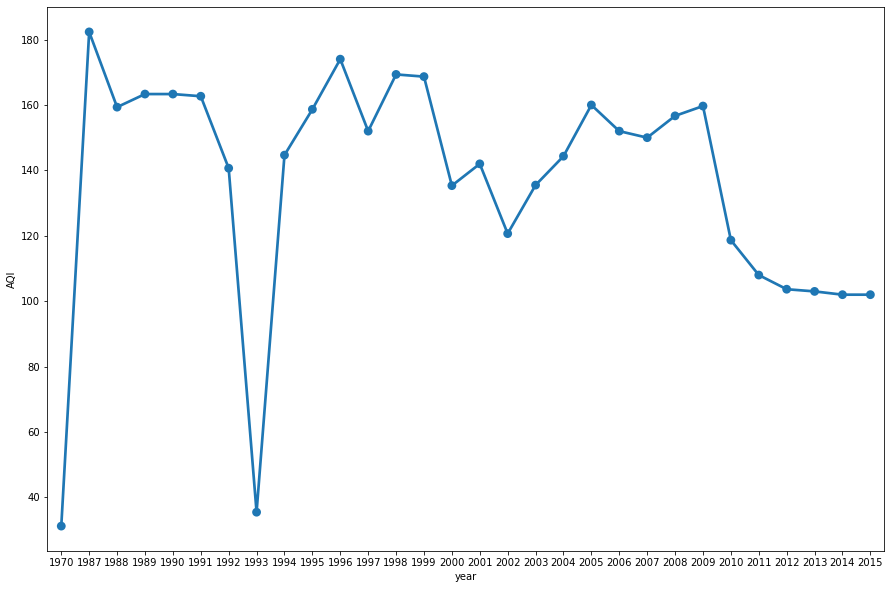

In [12]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

df = data[['AQI','year']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='AQI', data=df)

## Data Analysis for different Intervals.

In [13]:
import itertools
import dateutil
import statsmodels.api as sm
import matplotlib.dates as mdates

In [14]:
df=data[['AQI','date']]
df["date"] = pd.to_datetime(df['date'])
df.head()

,AQI,date
0,21.750,1990-02-01
1,8.750,1990-02-01
2,35.625,1990-02-01
3,18.375,1990-03-01
4,9.375,1990-03-01


In [15]:
df.isna().sum()

AQI     0
date    0
dtype: int64

### Preprocessing the Monthly data values

In [16]:
# Calculating the monthly mean for the data 

mdf=df.set_index('date').resample('M')["AQI"].mean()
mdf.head()

date
1970-01-31    49.654762
1970-02-28          NaN
1970-03-31          NaN
1970-04-30          NaN
1970-05-31          NaN
Freq: M, Name: AQI, dtype: float64

In [17]:
# Removing months with NaN values

mdata=mdf.reset_index(level=0, inplace=False)
mdata = mdata[np.isfinite(mdata['AQI'])]
mdata=mdata[mdata.date != '1970-01-31']
mdata = mdata.reset_index(drop=True)
mdata.head()

,date,AQI
0,1987-01-31,242.438652
1,1987-02-28,235.787929
2,1987-03-31,294.558772
3,1987-04-30,202.012681
4,1987-05-31,307.991667


In [18]:
meanAQI = mdata.to_csv('meanAQI.csv',index=False)

### Preprocessing the weekly data values

In [19]:
# Calculating the weekly mean for the data 

weekly=df.set_index('date').resample('W')["AQI"].mean()
weekly.head()

date
1970-01-04    49.654762
1970-01-11          NaN
1970-01-18          NaN
1970-01-25          NaN
1970-02-01          NaN
Freq: W-SUN, Name: AQI, dtype: float64

In [20]:
# Removing weeks with NaN values

wdata=weekly.reset_index(level=0, inplace=False)
wdata = wdata[np.isfinite(wdata['AQI'])]
wdata=wdata[wdata.date != '1970-01-04']
wdata = wdata.reset_index(drop=True)
wdata.head()

,date,AQI
0,1987-01-04,264.269531
1,1987-01-11,205.349432
2,1987-01-18,400.728947
3,1987-01-25,42.000000
4,1987-02-01,289.762500


### Visualizing the processed data of AQI on monthly basis

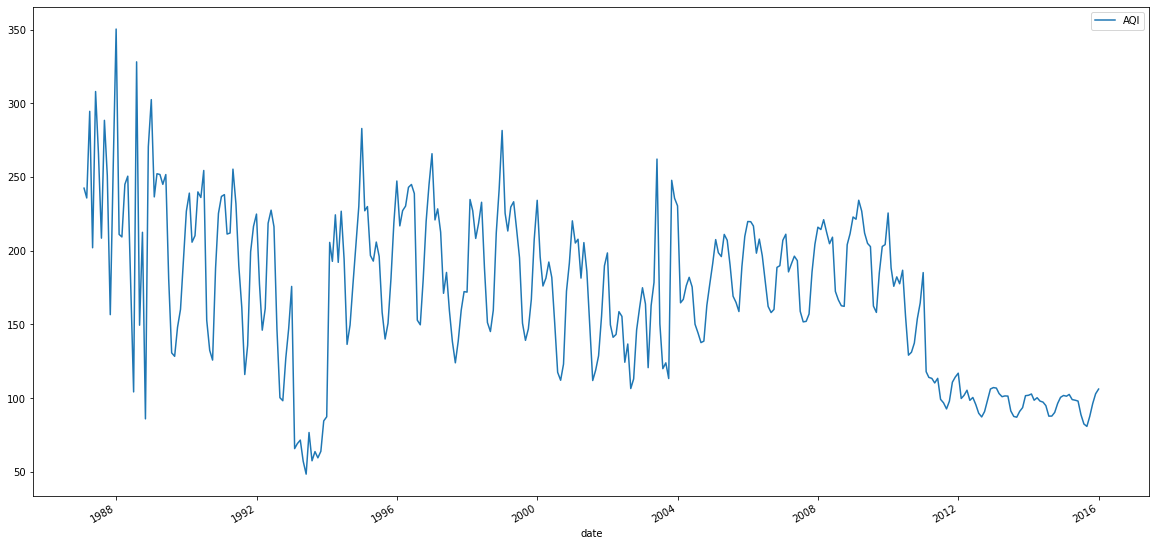

In [21]:
mdf=mdata.set_index('date')
mdf.sort_values(by='date',ascending=False)
mdf.plot(figsize=(20,10))
plt.show()
y=mdf.AQI

### Visualizing the processed data of AQI on weekly basis

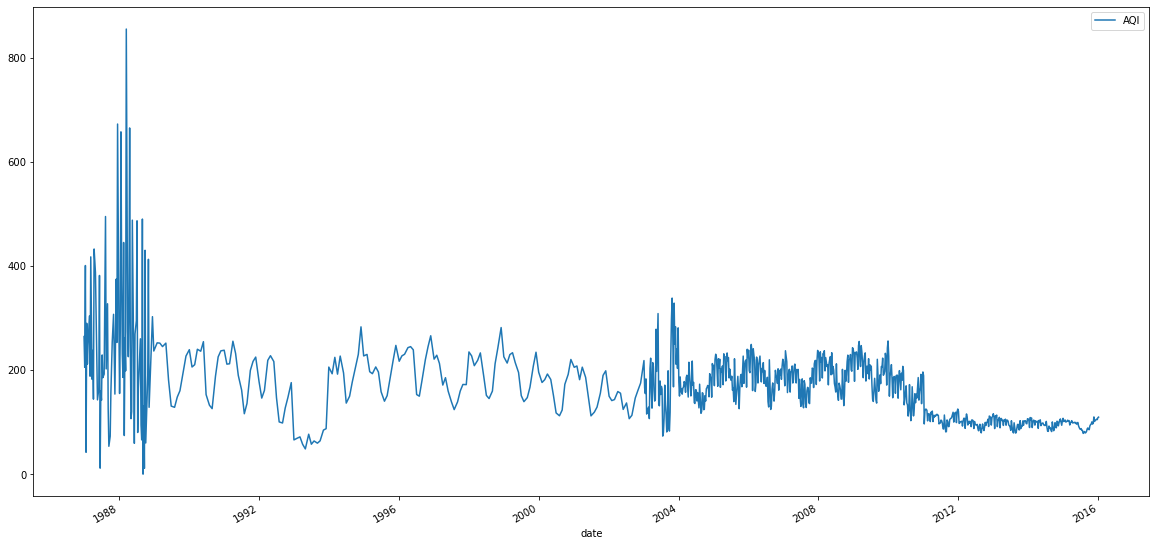

In [22]:
wdf=wdata.set_index('date')
wdf.sort_values(by='date',ascending=False)
wdf.plot(figsize=(20, 10))
plt.show()
y=wdf.AQI

# Data Analysis for Top HotSpots of each year

In [23]:
longitudes = state["long"].tolist()
latitudes = state["lat"].tolist()

In [24]:
stlist=state['state'].tolist()
stlist = [x.strip(' ') for x in stlist]
data['state'] = [x.strip(' ') for x in data['state']]

In [25]:
yrst = pd.DataFrame(0, index=np.arange(29), columns=stlist)

In [26]:
for yr in range(1987,2016):
    for st in range(len(stlist)):
        ydata =data[data["year"]==yr]
        ysdata = ydata[ydata["state"]==stlist[st]]
        ysdata['AQI'] = ysdata['AQI'].fillna(0.0).astype(int)
        ysdata = ysdata[(ysdata['AQI']>0)]
        if ysdata.empty:
            yrst.at[yr-1987,stlist[st]] = 0
        else:
            yrst.at[yr-1987,stlist[st]] = np.median(ysdata['AQI'])

In [27]:
yrst

,andaman-and-nicobar-islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli,Delhi,Goa,...,Sikkim,Tamil Nadu,Tripura,Uttar Pradesh,Uttaranchal,West Bengal,Telangana,Daman & Diu,Uttarakhand,Gujarat
0,0,0,0,0,242,0,0,0,494,41,...,0,140,0,323,0,243,0,0,0,182
1,0,0,0,0,267,0,0,0,109,108,...,0,120,0,312,0,275,0,0,0,197
2,0,0,0,0,196,152,0,0,0,132,...,0,125,0,302,0,235,0,45,0,225
3,0,25,0,0,228,173,0,0,297,109,...,0,107,0,335,0,213,0,33,0,190
4,0,121,0,35,253,203,0,0,296,115,...,0,111,0,367,0,205,0,8,0,226
5,0,161,0,48,225,291,0,8,312,20,...,0,17,0,296,0,134,0,102,0,169
6,0,14,0,36,91,37,11,8,40,40,...,0,16,0,35,0,114,0,29,0,36
7,0,29,0,44,228,143,11,100,353,35,...,0,29,0,421,0,204,0,109,0,238
8,0,128,0,36,224,145,0,105,344,187,...,0,40,0,396,0,205,0,5,0,190
9,0,132,0,118,243,132,0,0,323,161,...,0,41,0,383,0,198,0,0,0,170


In [28]:
import folium

In [29]:
def hotspot(yearr):
    yearly_hotspot = folium.Map(location=[20.5937, 78.9629],zoom_start=5)
    l=yrst.values.tolist()
    curr=l[yearr-1987]
    ax=0
    ay=0
    az=0
    axx=-1
    ayy=-1
    azz=-1
    for i in range(37):
        if curr[i]>=ax:
            az=ay
            azz=ayy
            ay=ax
            ayy=axx
            ax=curr[i]
            axx=i
        elif curr[i]>=ay:
            az=ay
            azz=ayy
            ay=curr[i]
            ayy=i
        elif curr[i]>=az:
            az=curr[i]
            azz=i
            
    if axx!=-1:        
        print('1.AQI = '+str(ax)+' for '+str(stlist[axx]))
    if ayy!=-1:
        print('2.AQI = '+str(ay)+' for '+str(stlist[ayy]))
    if azz!=-1:    
        print('3.AQI = '+str(az)+' for '+str(stlist[azz]))
        
    if axx!=-1:
        folium.Marker([latitudes[axx],longitudes[axx]],popup = "AQI="+str(ax)).add_to(yearly_hotspot)
    if ayy!=-1:
        folium.Marker([latitudes[ayy],longitudes[ayy]],popup = "AQI="+str(ay)).add_to(yearly_hotspot)
    if azz!=-1:
        folium.Marker([latitudes[azz],longitudes[azz]],popup = "AQI="+str(az)).add_to(yearly_hotspot)    
    yearly_hotspot.save("templates/yearly_hotspot.html")

# Deployment of Model for each year's Hotspots in India.

In [ ]:
from werkzeug.wrappers import Request, Response
from flask import Flask, render_template, request

app = Flask(__name__)

@app.route("/")
def home():
    return render_template('index.html')

@app.route("/display",methods=["GET","POST"])
def display():
    if request.method == "POST":
        indexYear = int(request.form.get("year"))
        print('Year = '+str(indexYear))
        hotspot(indexYear)
        return render_template("yearly_hotspot.html")
    
    else:
        return render_template('index.html')

if(__name__ == "__main__"):
    from werkzeug.serving import run_simple
    app.debug = True
    run_simple('localhost', 9000, app)

 * Running on http://localhost:9000/ (Press CTRL+C to quit)
